<a href="https://colab.research.google.com/github/mhakashif/Swiggy-Churn-And-Analytics/blob/main/Swiggy%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
df = pd.read_csv('swiggy.csv')
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [ ]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [ ]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [4]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [5]:
# Step 1: Get the unique cities
unique_cities = df['City'].unique()

# Step 2: Ask the user to select a city from the available ones
print("Available cities:")
for idx, city in enumerate(unique_cities):
    print(f"{idx + 1}. {city}")

city_choice = input("Please choose a city by typing its name (or number): ").strip()

# Handle input as either number or city name
if city_choice.isdigit():
    city_choice = unique_cities[int(city_choice) - 1] if 1 <= int(city_choice) <= len(unique_cities) else None
else:
    city_choice = city_choice if city_choice in unique_cities else None

if city_choice:
    print(f"\nYou have selected: {city_choice}")

    # Step 3: Get the areas associated with the chosen city
    available_areas = df[df['City'] == city_choice]['Area'].unique()

    print("Available areas in", city_choice, ":")
    for idx, area in enumerate(available_areas):
        print(f"{idx + 1}. {area}")

    area_choice = input("Please choose an area by typing its name (or number): ").strip()

Available cities:
1. Bangalore
2. Hyderabad
3. Mumbai
4. Pune
5. Kolkata
6. Delhi
7. Chennai
8. Ahmedabad
9. Surat
Please choose a city by typing its name (or number): Hyderabad

You have selected: Hyderabad
Available areas in Hyderabad :
1. Film Nagar
2. Masab Tank
3. Banjara Hills
4. Punjagutta
5. Ramgopalpet
6. Kalasiguda
7. Adarsh Nagar
8. Himayatnagar
9. Karkhana
10. Koti
11. Dilsukhnagar
12. Nagole
13. Chandrapuri Colony
14. Kothapet
15. Narayanguda
16. New Nallakunta
17. Adikmet
18. Amberpet
19. Lakdikapul
20. Basheer Bagh
21. Abids
22. Khairtabad
23. Habsiguda
24. Uppal
25. West Marredpally
26. Murad Nagar
27. Redhills
28. Somajiguda
29. Kachiguda
30. Madhura Nagar
31. Huda Complex
32. Nampally
33. Jyothi Nagar
34. Tarnaka
35. Mehdipatnam
36. Toli Chowki
37. Himayath Nagar
38. Zamistanpur
39. Bn Reddy Nagar
40. Kavadiguda
41. Ameerpet
42. Old Malakpet
43. Malakpet
44. Sri Hanuman Nagar Colony
45. Chanchalguda
46. Santosh Nagar
47. Saidabad
48. Humayun Nagar
49. New Mallepally
5

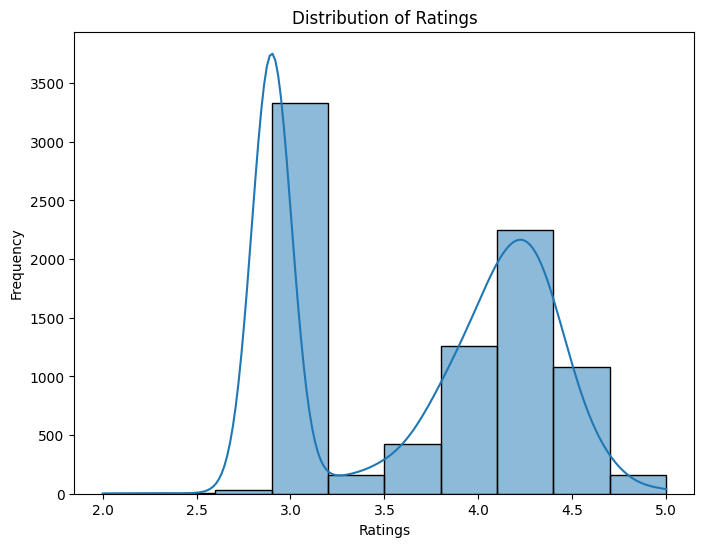

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Avg ratings'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [10]:
## Average Delivery Time
average_delivery_time = df['Delivery time'].mean()
print(f"Average Delivery Time: {average_delivery_time} minutes")

Average Delivery Time: 53.96705069124424 minutes


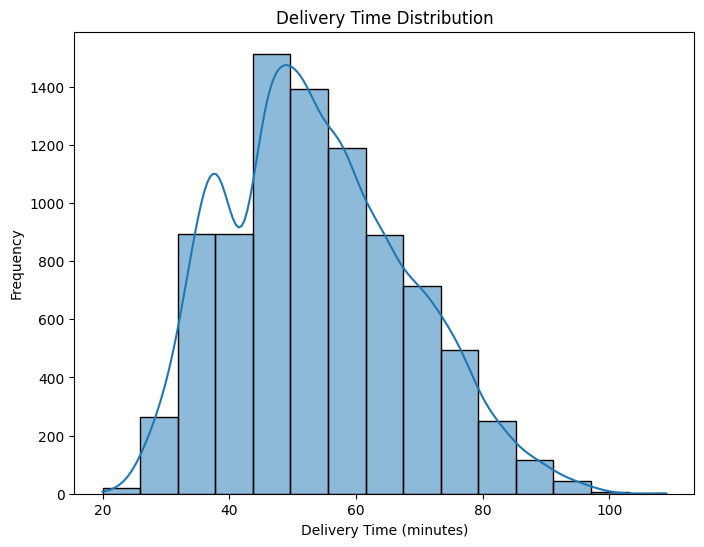

In [11]:
## Delivery Time
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery time'], bins=15, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

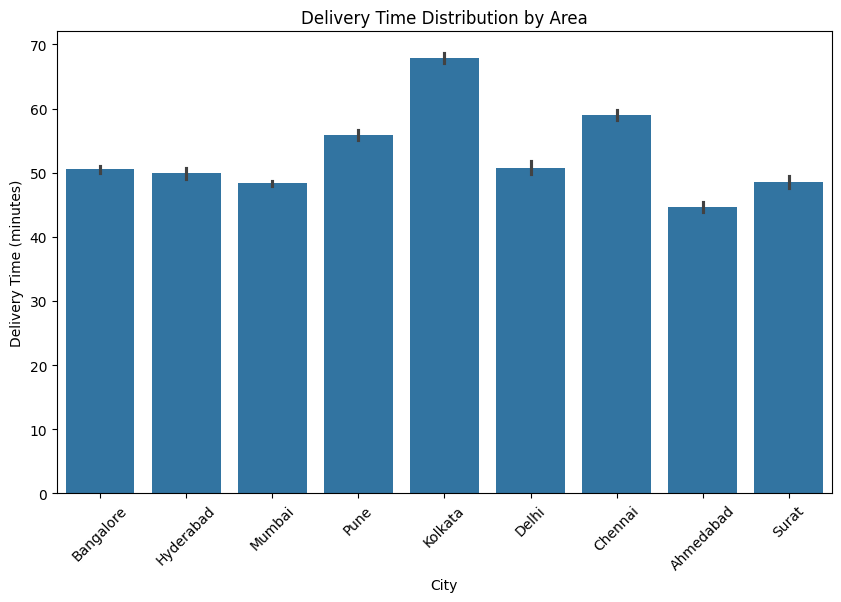

In [12]:
## Delivery Time by city
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Delivery time', data=df)
plt.title('Delivery Time Distribution by Area')
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [13]:
## Restaurant Popularity (by Total Ratings)
restaurant_popularity = df.groupby('Restaurant')['Total ratings'].sum().sort_values(ascending=False)
print(restaurant_popularity.head(20))  # Top  popular restaurants

Restaurant
Shah Ghouse Cafe & Restaurant    15000
Mehfil                           10160
Lucky Restaurant                 10020
Bawarchi                         10000
4M Biryani House                 10000
Grand Hotel                      10000
Burger King                       8000
The Bowl Company                  7000
La Pino'Z Pizza                   6500
Mcdonald'S                        6500
Kfc                               5220
Guru Kripa (Sion West)            5000
Mughal Arsalan Biryani            5000
Hotel Shadab                      5000
Abar Khaboo                       5000
Kolkata@99                        5000
Meridian Restaurant               5000
Cafe 555 & Aqeeq Restaurant       5000
Cafe Bahar Since 1973             5000
Gulab Wala                        5000
Name: Total ratings, dtype: int64


In [14]:
# Group by both 'City' and 'Restaurant', and calculate the sum of 'Total ratings'
restaurant_popularity = df.groupby(['City', 'Restaurant']).agg({
    'Total ratings': 'sum'

}).reset_index()

# Sort by 'Total ratings' in descending order to get the most popular restaurants
restaurant_popularity = restaurant_popularity.sort_values(by='Total ratings', ascending=False)

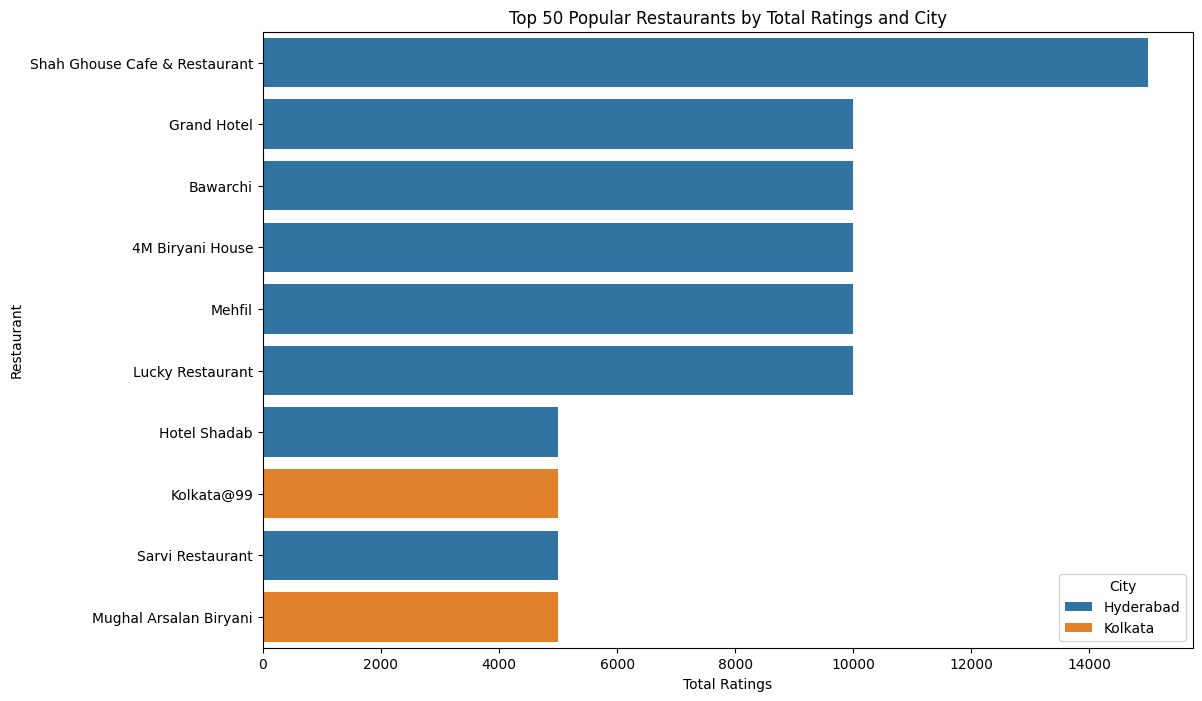

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total ratings', y='Restaurant', hue='City', data=restaurant_popularity.head(10))
plt.title('Top 50 Popular Restaurants by Total Ratings and City')
plt.xlabel('Total Ratings')
plt.ylabel('Restaurant')
plt.legend(title='City')
plt.show()

In [17]:
# bins for the 'Price' column (adjust the bins as needed)
price_bins = [0, 500, 1000, 1500, 2000]  # Define bin edges
price_labels = ['Low', 'Medium', 'High', 'Very High']
df['Price Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

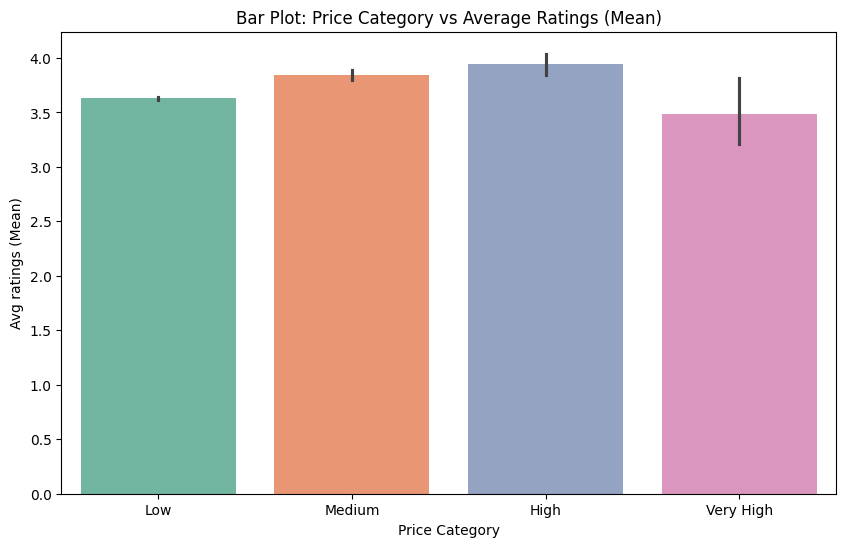

In [18]:
# Bar plot to visualize the relationship between Price and Average Ratings (Mean)
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Category', y='Avg ratings', data=df, palette="Set2", estimator=np.mean)
plt.title('Bar Plot: Price Category vs Average Ratings (Mean)')
plt.xlabel('Price Category')
plt.ylabel('Avg ratings (Mean)')
plt.show()

In [19]:
df.columns


Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time',
       'Price Category'],
      dtype='object')

In [20]:
food_counts = df['Food type'].value_counts()

# Display the most ordered food items
print("Most Ordered Food Items:")
print(food_counts)

Most Ordered Food Items:
Food type
Indian                                                      389
Chinese                                                     277
North Indian                                                246
Fast Food                                                   240
South Indian                                                228
                                                           ... 
Andhra,South Indian,North Indian,Biryani                      1
Healthy Food  Juices  Continental                             1
Bengali  Indian  Combo                                        1
South Indian,Indian,North Indian,Chinese,Biryani,Tandoor      1
Chaat,Snacks,Chinese                                          1
Name: count, Length: 3734, dtype: int64


In [21]:
summary = df.groupby('Food type').agg(
    total_orders=('ID', 'size'),
    average_rating=('Avg ratings', 'mean')
).reset_index()

# Sort the summary by total orders and average rating for better readability
summary_sorted = summary.sort_values(by=['total_orders', 'average_rating'], ascending=[False, False])

# Display the summary
print("Food Type Summary:")
print(summary_sorted)

Food Type Summary:
                                          Food type  total_orders  \
1829                                         Indian           389   
751                                         Chinese           277   
2525                                   North Indian           246   
1447                                      Fast Food           240   
3386                                   South Indian           228   
...                                             ...           ...   
1057                   Chinese,North Indian,Punjabi             1   
1790                Ice Cream  Beverages  Fast Food             1   
122                      Arabian,Continental,Snacks             1   
677                  Biryani,Thalis,Indian,Desserts             1   
1827  Ice Cream,Pizzas,Fast Food,Beverages,Desserts             1   

      average_rating  
1829        3.535733  
751         3.412635  
2525        3.571545  
1447        3.555417  
3386        3.863158  
...           

In [22]:
cities = df['City'].unique()
cities

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat'], dtype=object)

In [23]:
most_popular_cuisines = {}
for city in cities:
    city_df = df[df['City'] == city]
    cuisine_counts = city_df['Food type'].value_counts()
    most_popular_cuisine = cuisine_counts.index[0]
    most_popular_cuisines[city] = most_popular_cuisine
for city, most_popular_cuisine in most_popular_cuisines.items():
    print('The most popular cuisine in {} is {}'.format(city, most_popular_cuisine))

The most popular cuisine in Bangalore is South Indian
The most popular cuisine in Hyderabad is South Indian
The most popular cuisine in Mumbai is Chinese
The most popular cuisine in Pune is Chinese
The most popular cuisine in Kolkata is Indian
The most popular cuisine in Delhi is North Indian
The most popular cuisine in Chennai is Indian
The most popular cuisine in Ahmedabad is Indian
The most popular cuisine in Surat is Fast Food
